IMPORTING LIBRARIES

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

iMPORTING DATASET

In [16]:
dataset = pd.read_csv('data1.csv')
print("DATASET HEAD:\n\n", dataset.head())
print("\n\nDATASET INFO\n:",dataset.info())
print("\n\nDATASET DESCRIBE:\n",dataset.describe())

DATASET HEAD:

   InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   In

REMOVING THE MISSING CUSTOMERS ID AND DUPLICATES

In [17]:
dataset = dataset.dropna(subset=['CustomerID'])
dataset = dataset.drop_duplicates()

CEATING THE NEW COLUMNS FOR TOTAL AMOUNT

In [18]:
dataset['TOTAL_AMOUNT'] = dataset['Quantity'] * dataset['UnitPrice']

CREATING THE PIVOT TABLE

In [19]:
customer_product = dataset.pivot_table(index='CustomerID',
                                       columns='StockCode',
                                       values='TOTAL_AMOUNT',
                                       aggfunc='sum',
                                       fill_value=0
                                       )


print(customer_product.head())

StockCode   10002  10120  10123C  10124G  10125  10133  10135  11001  15034  \
CustomerID                                                                    
12395.0       0.0    0.0     0.0     0.0    0.0    0.0    0.0    0.0    0.0   
12427.0       0.0    0.0     0.0     0.0    0.0    0.0    0.0    0.0    0.0   
12431.0       0.0    0.0     0.0     0.0    0.0    0.0    0.0    0.0    0.0   
12433.0       0.0    0.0     0.0     0.0    0.0    0.0    0.0    0.0    0.0   
12471.0       0.0    0.0     0.0     0.0    0.0    0.0    0.0    0.0    0.0   

StockCode   15036  ...  90210B  90214J  90214M  90214S  90214V  BANK CHARGES  \
CustomerID         ...                                                         
12395.0       0.0  ...     0.0     0.0     0.0     0.0     0.0           0.0   
12427.0       0.0  ...     0.0     0.0     0.0     0.0     0.0           0.0   
12431.0       0.0  ...     0.0     0.0     0.0     0.0     0.0           0.0   
12433.0       0.0  ...     0.0     0.0     0.0

FEATURE SCALING

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customer_scaled = sc.fit_transform(customer_product)

USING ELBOW METHOD TO GET K NUMBER OF CLUSTER

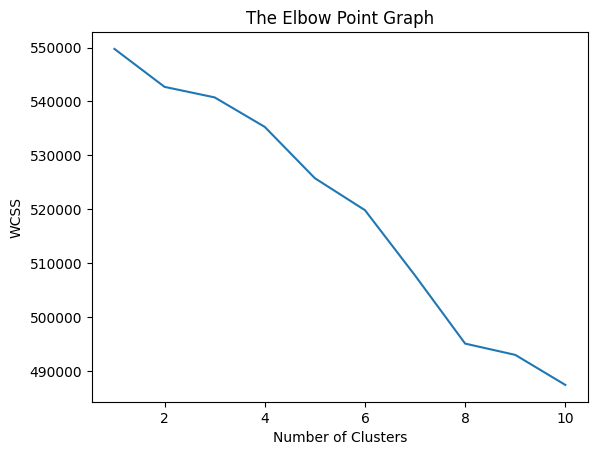

In [21]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(customer_scaled)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()



USING K-MEANS CLUSTERING

In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(customer_scaled)

print(y_kmeans)

[0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


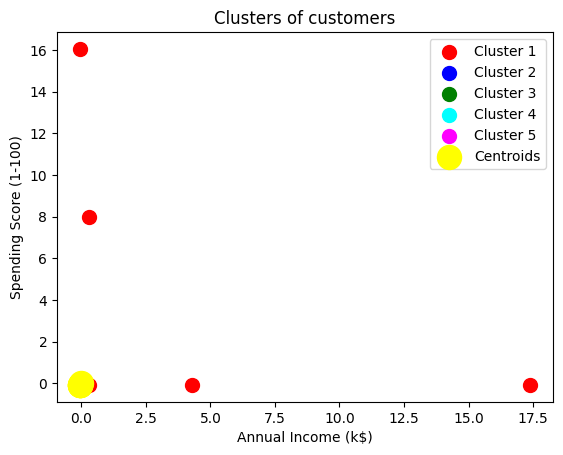

In [23]:
plt.scatter(customer_scaled[y_kmeans == 0, 0], customer_scaled[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(customer_scaled[y_kmeans == 1, 0], customer_scaled[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(customer_scaled[y_kmeans == 2, 0], customer_scaled[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(customer_scaled[y_kmeans == 3, 0], customer_scaled[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(customer_scaled[y_kmeans == 4, 0], customer_scaled[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

SAVING THE CLUSTER LABLES BACK TO THE DATASET

In [24]:
customer_dataset = pd.DataFrame(customer_scaled, index = customer_product.index)
print('\nCUSTOMER DATASET HEAD: \n\n',customer_dataset.head())
customer_dataset['Cluster'] = y_kmeans
print('\nCLUSTERED CUSTOMERS: \n',customer_dataset.head())
print('\n\nCLUSTER LABELS: \n',customer_dataset['Cluster'].value_counts())


CUSTOMER DATASET HEAD: 

                 0        1         2         3         4         5     \
CustomerID                                                              
12395.0    -0.069866 -0.07486 -0.055728 -0.055728 -0.055728 -0.084951   
12427.0    -0.069866 -0.07486 -0.055728 -0.055728 -0.055728 -0.084951   
12431.0    -0.069866 -0.07486 -0.055728 -0.055728 -0.055728 -0.084951   
12433.0    -0.069866 -0.07486 -0.055728 -0.055728 -0.055728 -0.084951   
12471.0    -0.069866 -0.07486 -0.055728 -0.055728 -0.055728 -0.084951   

                6         7         8         9     ...      1694      1695  \
CustomerID                                          ...                       
12395.0    -0.082699 -0.052133 -0.078934 -0.118864  ... -0.078934 -0.055728   
12427.0    -0.082699 -0.052133 -0.078934 -0.118864  ... -0.078934 -0.055728   
12431.0    -0.082699 -0.052133 -0.078934 -0.118864  ... -0.078934 -0.055728   
12433.0    -0.082699 -0.052133 -0.078934 -0.118864  ... -0.078934 

CLUSTER BASED PRODUCT RECOMMENDATION

In [25]:
customer_product_clustered = customer_product.merge(customer_dataset['Cluster'], left_index=True, right_index=True)
top_product_each_cluster = customer_product_clustered.groupby('Cluster').sum()
print(top_product_each_cluster.head())

print("\n\nTRANSPOSE: \n")
top_product_each_cluster = top_product_each_cluster.T
print(top_product_each_cluster.head())


top_product_each_cluster['Top_Cluster'] = top_product_each_cluster.idxmax(axis=1)

print(top_product_each_cluster)

         10002  10120  10123C  10124G  10125  10133  10135  11001  15034  \
Cluster                                                                    
0         52.7   0.63    0.65     2.1    1.7   7.65  26.25  25.35   0.28   
1          0.0   0.00    0.00     0.0    0.0   0.00   0.00   0.00   0.00   
2          0.0   0.00    0.00     0.0    0.0   0.00   0.00   0.00   0.00   
3          0.0   0.00    0.00     0.0    0.0   0.00   0.00   0.00   0.00   
4          0.0   0.00    0.00     0.0    0.0   0.00   0.00   0.00   0.00   

         15036  ...  90210B  90214J  90214M  90214S  90214V  BANK CHARGES  \
Cluster         ...                                                         
0         54.0  ...     5.9     2.5    1.25    1.25    1.25          15.0   
1          0.0  ...     0.0     0.0    0.00    0.00    0.00           0.0   
2          0.0  ...     0.0     0.0    0.00    0.00    0.00           0.0   
3          0.0  ...     0.0     0.0    0.00    0.00    0.00           0.0   
4    

RECOMMEND PRODUCT FOR SPECIFIC CUSTOMER

In [26]:
customer_id = customer_product.index[0]
print(customer_id)
cluster = customer_dataset.loc[customer_id, 'Cluster']
recommended_products = top_product_each_cluster[top_product_each_cluster['Top_Cluster'] == cluster].index
print(f"\nrecommended products for customer {customer_id} (cluster {cluster}):")
print(recommended_products[:10])

12395.0

recommended products for customer 12395.0 (cluster 0):
Index(['10002', '10120', '10123C', '10124G', '10125', '10133', '10135',
       '11001', '15034', '15036'],
      dtype='object')
